### Import required modules

In [160]:
from scipy.stats import mannwhitneyu
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import statistics
import csv

In [189]:
folder = '../results/DT/' # DIRECTORY FROM WHICH DATA IS RETRIEVED AND TO WHICH NEW DATA IS SAVED

In [190]:
with open(folder+'statistical_pvalues.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Group1', 'Group2', 'P-vlaue'])

In [191]:
with open(folder+'mean_values.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Group', 'Mean-value'])

# Tests for projects predictions (results fot RQ1)

### Data pre-processing

In [192]:
# Get the results csv file and convert it to a dataframe
data = folder+'projects_accuracy_results.csv'
data_df = pd.read_csv(data, sep=',')

# Create a new dataframes for each size and domain group
big_df = data_df[data_df['Predictor'].str.contains("BB|LB|UB|MB", regex=True)]
small_df = data_df[data_df['Predictor'].str.contains("BS|LS|US|MS", regex=True)]
business_df = data_df[data_df['Predictor'].str.contains("BB|BS", regex=True)]
library_df = data_df[data_df['Predictor'].str.contains("LB|LS", regex=True)]
utility_df = data_df[data_df['Predictor'].str.contains("UB|US", regex=True)]
multimedia_df = data_df[data_df['Predictor'].str.contains("MB|MS", regex=True)]

# Get the accuracy column of each dataframe
big_acc = big_df[['Accuracy']]
small_acc = small_df[['Accuracy']]
business_acc = business_df[['Accuracy']]
library_acc = library_df[['Accuracy']]
utility_acc = utility_df[['Accuracy']]
multimedia_acc = multimedia_df[['Accuracy']]

# Convert the accuracy values into NumPy arrays, then into lists
big_arr = np.array(big_acc, dtype = 'float32').ravel()
small_arr = np.array(small_acc, dtype = 'float32').ravel()
business_arr = np.array(business_acc, dtype = 'float32').ravel()
library_arr = np.array(library_acc, dtype = 'float32').ravel()
utility_arr = np.array(utility_acc, dtype = 'float32').ravel()
multimedia_arr = np.array(multimedia_acc, dtype = 'float32').ravel()

# Final lists to be tested
big = big_arr.tolist()
small = small_arr.tolist()
business = business_arr.tolist()
library = library_arr.tolist()
utility = utility_arr.tolist()
multimedia = multimedia_arr.tolist()

# Convert each list to dataframe for plotting purposes
big_plot = pd.DataFrame(big)
small_plot = pd.DataFrame(small)
business_plot = pd.DataFrame(business)
library_plot = pd.DataFrame(library)
utility_plot = pd.DataFrame(utility)
multimedia_plot = pd.DataFrame(multimedia)

### Save mean values for size and domain groups

In [193]:
with open(folder+'mean_values.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Big', statistics.mean(big)])
            writer.writerow(['Small', statistics.mean(small)])
            writer.writerow(['Business', statistics.mean(business)])
            writer.writerow(['Library', statistics.mean(library)])
            writer.writerow(['Utility', statistics.mean(utility)])
            writer.writerow(['Multimedia', statistics.mean(multimedia)])  
            
print("Successfully saved the mean values of the groups")

Successfully saved the mean values of the groups


### Perform Mann-Whitney U test between the Big and Small lists

In [194]:
result = mannwhitneyu(big, small)
with open(folder+'statistical_pvalues.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Big', 'Small', result.pvalue])
            
print("Successfully performed the test and saved the result")

Successfully performed the test and saved the result


### Plot the results for the Big Vs Small data comparison

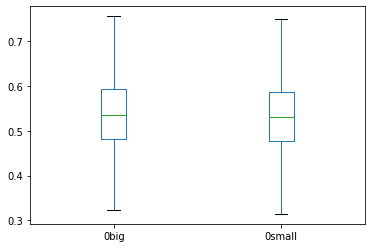

In [195]:
big_vs_small = big_plot.join(small_plot, lsuffix='big', rsuffix='small')
big_vs_small.boxplot(column=['0big', '0small'], grid=False, showfliers=False)
plt.savefig(folder+'plots/big_vs_small.png')

### Perform Mann-Whitney U test for all possible pair combinations among domains lists

In [196]:
domains = [business, library, utility, multimedia] # Include all lists in this parent list to iterate through it
domains_names = ["Business", "Library", "Utility", "Multimedia"] # List of strings that holds the names. MUST BE IN THE SAME ORDER
domains_plots = [business_plot, library_plot, utility_plot, multimedia_plot] # Include all dataframes in this list. MUST BE IN THE SAME ORDER

nr_domains = []
for i in range(len(domains)):
    nr_domains.append(i) 
    
pairs = list(itertools.combinations(nr_domains, 2))
for i in range(len(pairs)):
    result = mannwhitneyu(domains[pairs[i][0]], domains[pairs[i][1]]) 
    with open(folder+'statistical_pvalues.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([domains_names[pairs[i][0]], domains_names[pairs[i][1]], result.pvalue])
            
print("Successfully performed the tests and saved the results")

Successfully performed the tests and saved the results


### Plot the results for all possible pair combinations among domains data

In [197]:
for i in range(len(pairs)):
    combined_df = domains_plots[pairs[i][0]].join(domains_plots[pairs[i][1]], lsuffix=domains_names[pairs[i][0]], rsuffix=domains_names[pairs[i][1]])
    pb = combined_df.boxplot(column=['0' + domains_names[pairs[i][0]], '0' + domains_names[pairs[i][1]]], grid=False, showfliers=False)
    pb.set_ylabel('Prediction accuracy')
    plt.savefig(folder+'plots/'+domains_names[pairs[i][0]]+'_vs_'+domains_names[pairs[i][1]]+'.png')
    plt.close()

# Tests for combinations predictions (results for RQ2)

### Data pre-processing

In [198]:
diversity_data = folder+'combinations_accuracy_results.csv'
diversity_df = pd.read_csv(diversity_data, sep=',')

diverse_df = diversity_df[diversity_df['Predictor'].str.contains("1|2|3|4|5|6|7|8", regex=True)]
nondiverse_df = diversity_df[diversity_df['Predictor'].str.contains("nondiverse", regex=True)]


diverse_acc = diverse_df[['Accuracy']]
nondiverse_acc = nondiverse_df[['Accuracy']]

diverse_arr = np.array(diverse_acc, dtype = 'float32').ravel()
nordiverse_arr = np.array(nondiverse_acc, dtype = 'float32').ravel()

diverse = diverse_arr.tolist()
nondiverse = nordiverse_arr.tolist()

### Save the mean values of the groups

In [199]:
with open(folder+'mean_values.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Diverse', statistics.mean(diverse)])
            writer.writerow(['Non-diverse', statistics.mean(nondiverse)])
            
print("Successfully saved the mean values of the groups")

Successfully saved the mean values of the groups


### Perform Mann-Whitney U test between the Diverse and Non-diverse lists

In [200]:
div_result = mannwhitneyu(diverse, nondiverse)
with open(folder+'statistical_pvalues.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Diverse', 'Non-diverse', div_result.pvalue])
            
print("Successfully performed the test and saved the result")

Successfully performed the test and saved the result


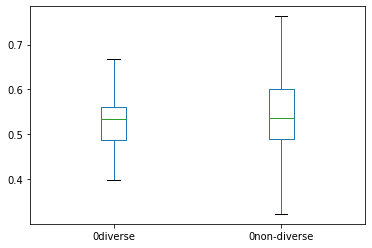

In [201]:
diverse_plot = pd.DataFrame(diverse)
nondiverse_plot = pd.DataFrame(nordiverse)

diverse_vs_nondiverse = diverse_plot.join(nondiverse_plot, lsuffix='big', rsuffix='small')
diverse_vs_nondiverse = diverse_plot.join(nondiverse_plot, lsuffix='diverse', rsuffix='non-diverse').boxplot(column=['0diverse', '0non-diverse'], grid=False, showfliers=False)
plt.savefig(folder+'plots/Diverse_vs_Nondiverse.png')